In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 데이터 로드
- tracks_prepared.csv
- tracks_genres.csv

In [3]:
# 데이터 로드
df = pd.read_csv('./data/tracks_prepared.csv')
df

,artist_followers,artist_popularity,explicit,tempo,album_release_date,energy,key,popularity,speechiness,danceability,valence,acousticness,liveness,instrumentalness,loudness,year,decade,hit_category
0,2338837.0,74.0,0,97.129,2018,0.123,7.0,0.0,0.0407,0.373,0.138,0.94800,0.0816,0.000000,-15.193,2018,2010,0
1,84914.0,51.0,0,103.773,1996,0.453,5.0,71.0,0.0348,0.744,0.122,0.62700,0.0898,0.421000,-11.977,1996,1990,1
2,59150.0,54.0,0,122.030,2014,0.878,9.0,0.0,0.0357,0.747,0.897,0.07940,0.3700,0.000531,-5.209,2014,2010,0
3,1528.0,0.0,0,84.099,2001,0.484,7.0,0.0,0.0356,0.604,0.564,0.10000,0.0865,0.000000,-7.097,2001,2000,0
4,6776.0,28.0,0,156.017,2014,0.447,0.0,7.0,0.0613,0.761,0.761,0.06160,0.0822,0.873000,-10.961,2014,2010,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751624,37474.0,33.0,0,128.011,2022,0.709,2.0,12.0,0.0528,0.807,0.740,0.00232,0.0445,0.786000,-11.361,2022,2020,0
751625,40725.0,36.0,0,123.006,2022,0.743,11.0,28.0,0.0532,0.803,0.176,0.00120,0.0618,0.308000,-6.241,2022,2020,0
751626,10523.0,32.0,0,92.999,2016,0.756,1.0,0.0,0.0376,0.655,0.401,0.00992,0.3370,0.028000,-7.407,2016,2010,0
751627,43895.0,42.0,0,85.571,2017,0.636,3.0,0.0,0.0343,0.596,0.409,0.05580,0.0629,0.000000,-8.882,2017,2010,0


In [4]:
# year와 겹치는 컬럼 album_release_date 제거
df = df.drop('album_release_date', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751629 entries, 0 to 751628
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   artist_followers   751629 non-null  float64
 1   artist_popularity  751629 non-null  float64
 2   explicit           751629 non-null  int64  
 3   tempo              751629 non-null  float64
 4   energy             751629 non-null  float64
 5   key                751629 non-null  float64
 6   popularity         751629 non-null  float64
 7   speechiness        751629 non-null  float64
 8   danceability       751629 non-null  float64
 9   valence            751629 non-null  float64
 10  acousticness       751629 non-null  float64
 11  liveness           751629 non-null  float64
 12  instrumentalness   751629 non-null  float64
 13  loudness           751629 non-null  float64
 14  year               751629 non-null  int64  
 15  decade             751629 non-null  int64  
 16  hi

### 학습

In [5]:
# 데이터 일부 샘플링: 10만 개
df_sample = df.sample(n=100000, random_state=42)

# 학습에 불필요한 컬럼
not_used_col = ['popularity', 'hit_category', 'year', 'decade']

# 특성과 목적 데이터 분리
features = [col for col in df_sample.columns if col not in not_used_col]
target = 'popularity'

In [6]:
from sklearn.model_selection import train_test_split

# X, y 데이터
X = df_sample[features]
y = df_sample[target]

# 학습/평가 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

# 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##### Random Forest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=100, random_state=42, n_jobs=1
)

# RandomForest는 스케일링 불필요
rf_model.fit(X, y)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


##### Ridge Regression

In [8]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=0.01, random_state=42)
ridge_model.fit(X_train_scaled, y_train)

,alpha,0.01
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,42


##### Lasso Regression

In [9]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

,alpha,0.01
,fit_intercept,True
,precompute,False
,copy_X,True
,max_iter,1000
,tol,0.0001
,warm_start,False
,positive,False
,random_state,42
,selection,'cyclic'


#### 모델에 따른 임의의 샘플링에 대한 특성 중요도 파악

In [11]:

# 시각화하기 용이한 DataFrame으로 변환
rf_iptc = pd.DataFrame({
    'feature': features,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# L1, L2 규제에서는 계수의 절댓값으로 분석
ridge_iptc = pd.DataFrame({
    'feature': features,
    'importance': abs(ridge_model.coef_)
}).sort_values('importance', ascending=False)

lasso_iptc = pd.DataFrame({
    'feature': features,
    'importance': abs(lasso_model.coef_)
}).sort_values('importance', ascending=False)

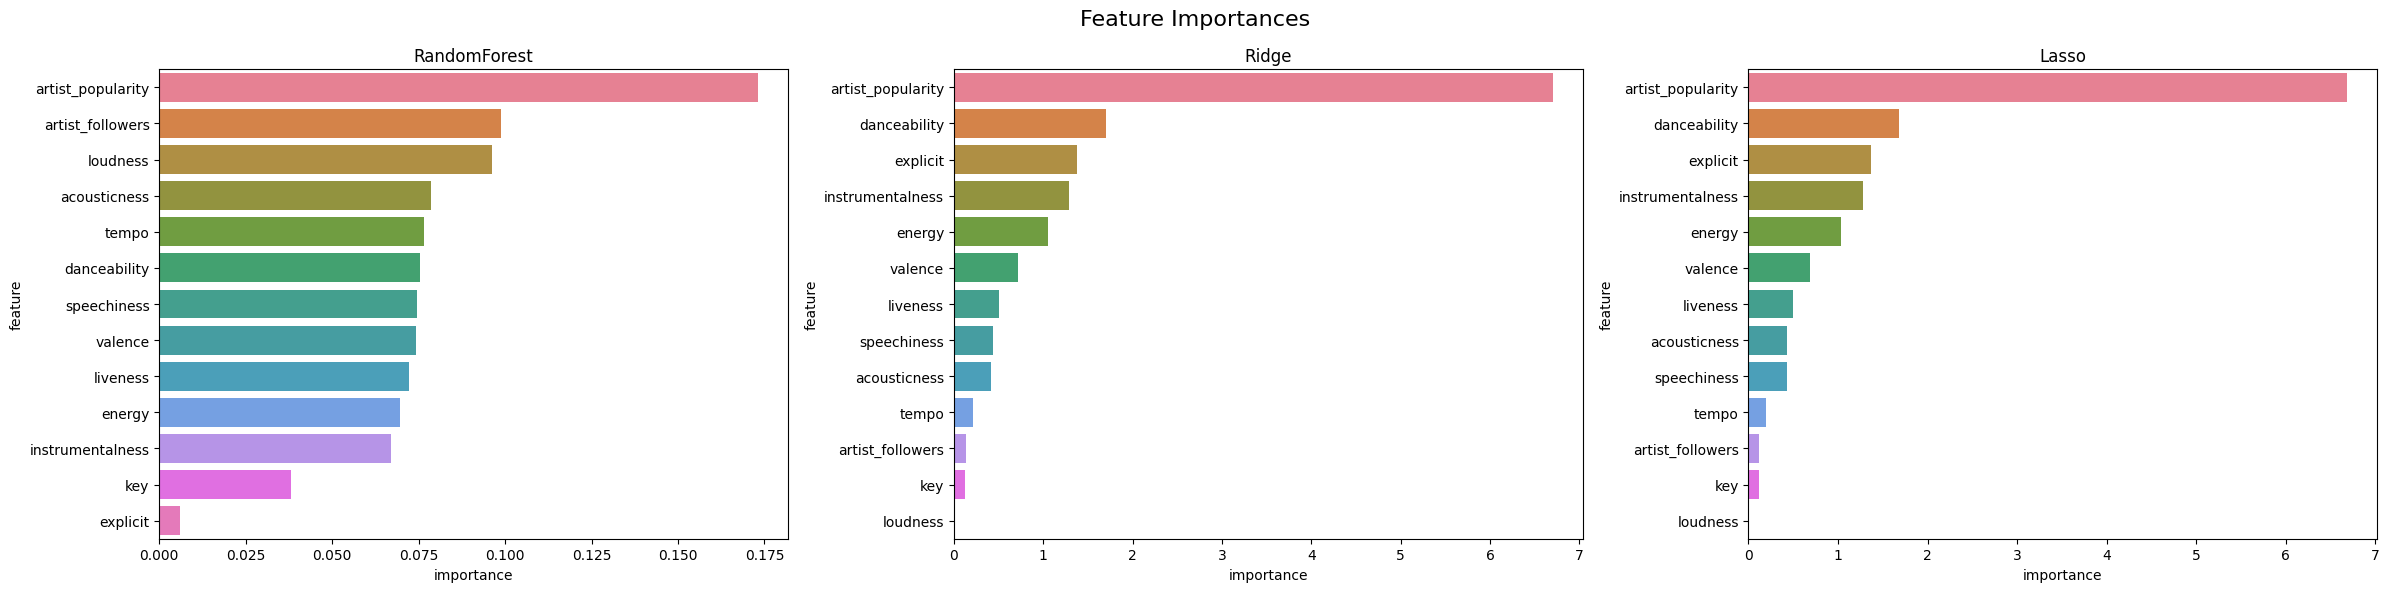

In [12]:
# 시각화
plt.figure(figsize=(24, 6))
plt.suptitle('Feature Importances', fontsize=16)

models = ['RandomForest', 'Ridge', 'Lasso']

for idx, model_iptc in enumerate([rf_iptc, ridge_iptc, lasso_iptc]):
    plt.subplot(1, 3, idx + 1)

    sns.barplot(
        x=model_iptc['importance'],
        y=model_iptc['feature'],
        hue=model_iptc['feature']
    )

    plt.title(f"{models[idx]}")

plt.tight_layout()
plt.show()

In [ ]:
df_scaled = pd.DataFrame(X_train_scaled, columns=features)

,artist_followers,artist_popularity,explicit,tempo,energy,key,speechiness,danceability,valence,acousticness,liveness,instrumentalness,loudness
0,-0.133762,0.130515,-0.319832,0.946682,0.582651,-0.905836,-0.519158,-0.334184,0.169418,-1.037396,-0.571729,-0.270785,0.410389
1,-0.270031,-0.804973,3.126638,1.268635,0.774958,1.622874,1.830218,1.531242,1.336991,-0.989565,-0.764901,-0.723698,0.634297
2,-0.269333,-0.960887,-0.319832,1.929742,0.862371,0.499003,-0.421859,-0.476062,0.758729,0.090389,-0.029037,-0.723701,0.541418
3,-0.137494,0.702201,-0.319832,0.020712,-0.308955,-1.467772,-0.419673,0.459279,-1.057086,0.431654,-0.571126,-0.716976,-0.270578
4,-0.266002,-0.233286,-0.319832,-0.635635,0.170065,-0.062933,-0.617549,0.653703,-0.007375,-1.085732,-0.415381,1.137719,0.281415
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.884756,1.637689,-0.319832,-1.418143,-0.333430,-0.062933,-0.576006,-1.437676,-1.341797,-0.981235,-0.451601,-0.712447,0.187508
69996,-0.236012,-0.337229,-0.319832,-0.897674,0.313421,0.499003,-0.484174,1.042553,1.152831,-0.857896,-0.415381,-0.723640,0.581621
69997,0.102571,0.910087,-0.319832,0.719868,-0.822940,1.341906,-0.460123,-0.239599,0.592985,1.154489,-0.511967,-0.723705,-0.805551
69998,-0.272477,-0.753001,-0.319832,0.669246,0.351882,-0.062933,-0.162761,0.080939,0.515638,-0.382544,0.339197,0.781666,0.704433


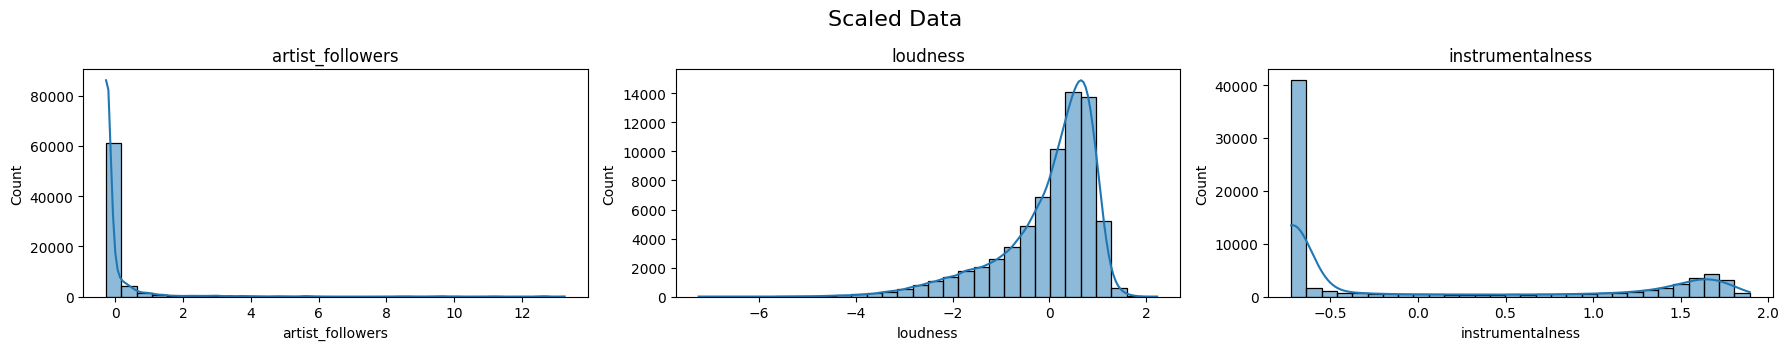

In [ ]:
# 모델별 중요도 격차가 큰 feature 분석
plt.figure(figsize=(18, 6))
plt.suptitle('Scaled Data', fontsize=16)

feature_names = ['artist_followers', 'loudness', 'instrumentalness']

for i, feature in enumerate(feature_names):
    plt.subplot(2, 3, i + 1)
    
    sns.histplot(df_scaled[feature], kde=True, bins=30)
    
    plt.title(f'{feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()